In [1]:
import math
c = 6 / (math.pi**2)

import numpy as np
import matplotlib.pyplot as plt

N = 30030
import funcs
funcs.init(N)

phi = [0]+[funcs.totient[i] for i in range(1, N+1)]
sigma = [0]+[funcs.sigma[i] for i in range(1, N+1)]
a = [0] + [phi[i]*sigma[i]/i**2 for i in range(1, N+1)]
pfactorize=funcs.pfactorize

Initializing precomputed data up to n=30030...

Loading totient and sigma...		 finished (179 ms)
Computing prime factorizations...	 finished (88 ms)

Initialization completed in 269 ms


# Sigma and Phi from 1 to 100

plt.figure(figsize=(10, 8), dpi=80)
x = np.arange(1, N+1)
ysigma = [sigma[i] for i in x]
yphi = [phi[i] for i in x]

plt.plot(x, ysigma, '-x', label=r'$\sigma(n)$')
plt.plot(x, yphi, '-x', label=r'$\varphi(n)$')

plt.ylim(-2, 254)  # y-axis limits
plt.xlim(-1, 100)

plt.legend(loc='lower right')
plt.show()


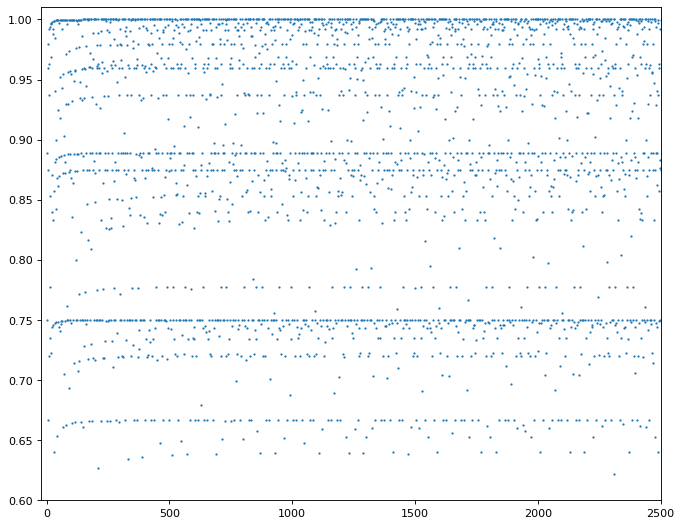

In [4]:
# Upper and Lower Bounds

plt.figure(figsize=(10, 8), dpi=80)
x = np.arange(2, N+1)
y = [a[i] for i in x]
plt.plot(x, y, '.', markersize=2)

plt.ylim(0.6, 1.01)
plt.xlim(-25, 2500)

#plt.axhline(y=1, c='red', linewidth=1)
#plt.axhline(y=0.6079, c='red', linewidth=1)

# --- Add custom y tick ---
# plt.yticks(
#     [6 / math.pi**2] + [i/100 for i in range(65, 101, 5)],                 # add the numerical location
#     [r'$6/\pi^2$'] + ["0."+str(i) for i in range(65, 96, 5)] + ['1']    # add the label
# )
plt.show()


# 2 Million

plt.figure(figsize=(10, 8), dpi=120)
x = np.arange(2, N+1)
y = [a[i] for i in x]
plt.plot(x, y, ',', label='$a_n$')

plt.ylim(0.6, 1.01)  # y-axis limits
plt.xlim(-20000, 2000000)
plt.show()


# Max & Min lines
x_top = []
y_top = []
top = float('-inf')
for i in range(2, N+1):
    if a[i] > top:
        top = a[i]
        x_top.append(i)
        y_top.append(a[i])

x_bottom = []
y_bottom = []
bottom = float('inf')
for i in range(2, N+1):
    if a[i] < bottom:
        bottom = a[i]
        x_bottom.append(i)
        y_bottom.append(a[i])

plt.figure(figsize=(10, 8), dpi=70)
x = np.arange(2, N+1)
y = [a[i] for i in x]
plt.plot(x, y, ',', label=r'$a_n$')

plt.plot(x_top, y_top, '-^', markersize=3, linewidth=0.5, color='tab:blue', label='topmost points')
plt.plot(x_bottom, y_bottom, '-v', markersize=3, linewidth=0.5, color='tab:blue', label='bottommost points')


plt.axhline(y=1, color='gray', linewidth=1, label=r'$1$')
plt.axhline(y=0.6079, color='gray', linewidth=1, label=r'$6/\pi^2$')

plt.legend(loc='center right')

plt.ylim(0.6, 1.01)  # y-axis limits
plt.xlim(-25, 2500)
plt.show()



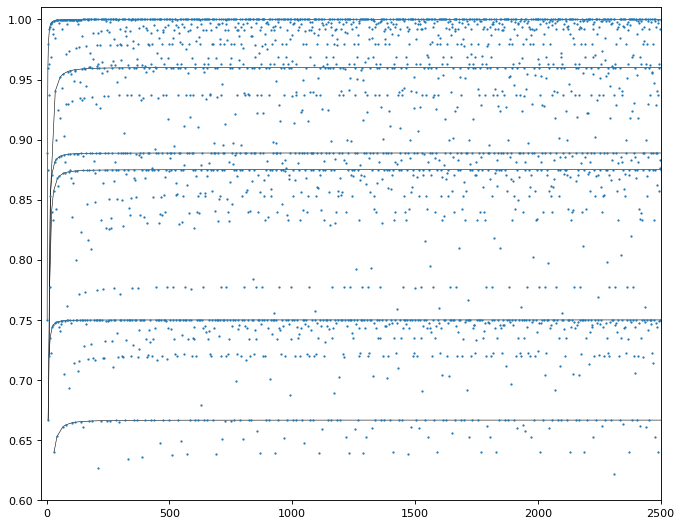

In [16]:
# 6 Densest
x1  = [i for i in range(2, N+1) if pfactorize[i].total() == 1]
x2  = [i for i in range(2, N+1) if pfactorize[i].total() == 2 and pfactorize[i][2]==1]
x3  = [i for i in range(2, N+1) if pfactorize[i].total() == 2 and pfactorize[i][3]==1]
x4  = [i for i in range(2, N+1) if pfactorize[i].total() == 3 and pfactorize[i][2]==2]
x5  = [i for i in range(2, N+1) if pfactorize[i].total() == 2 and pfactorize[i][5]==1]
x6  = [i for i in range(2, N+1) if pfactorize[i].total() == 3 and pfactorize[i][2]==1 and pfactorize[i][3]==1]

y1  = [a[i] for i in x1]
y2  = [a[i] for i in x2]
y3  = [a[i] for i in x3]
y4  = [a[i] for i in x4]
y5  = [a[i] for i in x5]
y6  = [a[i] for i in x6]

plt.figure(figsize=(10, 8), dpi=80)
x = range(2, N+1)
y = [a[i] for i in x]

plt.plot(x1, y1, linewidth=0.5, c='black')
plt.plot(x2, y2, linewidth=0.5, c='black')
plt.plot(x3, y3, linewidth=0.5, c='black')
plt.plot(x4, y4, linewidth=0.5, c='black')
plt.plot(x5, y5, linewidth=0.5, c='black')
plt.plot(x6, y6, linewidth=0.5, c='black')

plt.plot(x, y, '.', markersize=2)

plt.plot()

plt.ylim(0.6, 1.01)  # y-axis limits
plt.xlim(-25, 2500)
plt.show()

